In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Explore death rates from different resp diseases

In [14]:
filename = "C:/Users/LH/DataOpen2021/data_NO_UPLOAD/us_chronic_resp_disease.csv"

In [15]:
disease = pd.read_csv(filename)


## Basic information

In [16]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353700 entries, 0 to 3353699
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   location_name  object 
 1   FIPS           float64
 2   cause_name     object 
 3   sex            object 
 4   year_id        int64  
 5   mx             float64
 6   lower          float64
 7   upper          float64
dtypes: float64(4), int64(1), object(3)
memory usage: 204.7+ MB


In [17]:
disease.isna().any()

location_name    False
FIPS              True
cause_name       False
sex              False
year_id          False
mx               False
lower            False
upper            False
dtype: bool

In [18]:
# we drop FIPs
disease.drop('FIPS',axis=1,inplace=True)

## Explore how death rates from different types of diseases have changed over time

In [19]:
# different types of diseases
disease.cause_name.unique()

array(['Chronic respiratory diseases',
       'Chronic obstructive pulmonary disease', 'Pneumoconiosis',
       'Silicosis', 'Asbestosis', 'Coal workers pneumoconiosis',
       'Other pneumoconiosis', 'Asthma',
       'Interstitial lung disease and pulmonary sarcoidosis',
       'Other chronic respiratory diseases'], dtype=object)

There is missing data FIPs, otherwise it's fine

In [20]:
causes = disease[['cause_name','year_id','mx']].groupby(['cause_name','year_id']).mean()

In [21]:
all_causes = disease.cause_name.unique()

In [22]:
all_causes

array(['Chronic respiratory diseases',
       'Chronic obstructive pulmonary disease', 'Pneumoconiosis',
       'Silicosis', 'Asbestosis', 'Coal workers pneumoconiosis',
       'Other pneumoconiosis', 'Asthma',
       'Interstitial lung disease and pulmonary sarcoidosis',
       'Other chronic respiratory diseases'], dtype=object)

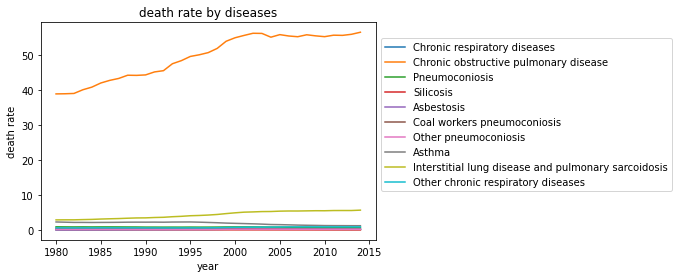

In [23]:
ax = causes.xs('Asbestosis').plot(title='death rate by diseases',xlabel='year',ylabel='death rate')
for cause_name in all_causes[1:]:
    causes.xs(cause_name).plot(ax=ax,xlabel='year',ylabel='death rate')
ax.legend(all_causes,loc='lower right',bbox_to_anchor=(1.9, 0.2),fancybox=True)

# Sales per day

## General 

In [24]:
filename = "sales_per_day.csv"
sales = pd.read_csv(filename)

In [25]:
sales

,Entity,Code,Year,amt
0,Armenia,ARM,1988,12.0
1,Armenia,ARM,1989,11.6
2,Armenia,ARM,1990,11.9
3,Armenia,ARM,1991,9.3
4,Armenia,ARM,1992,4.9
...,...,...,...,...
2762,Yugoslavia,OWID_YGS,1988,8.9
2763,Yugoslavia,OWID_YGS,1989,8.5
2764,Yugoslavia,OWID_YGS,1990,8.5
2765,Yugoslavia,OWID_YGS,1991,7.8


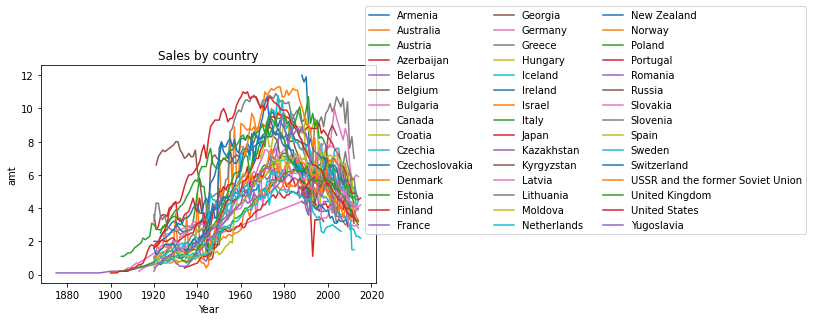

In [26]:
fig,ax = plt.subplots()
countries = sales.Entity.unique()
countries
for country in countries:
    sales.loc[sales.Entity==country].plot(x='Year',y='amt',ax=ax,title="Sales by country",ylabel='amt')
ax.legend(countries,loc='lower right',ncol=3,bbox_to_anchor=(2.3, 0.2),fancybox=True)


## HIC vs non-HIC

### Scraping world bank data

In [27]:
import requests
url = "https://data.worldbank.org/country/XD"
req = requests.get(url=url).content
from bs4 import BeautifulSoup
soup = BeautifulSoup(req)
HIC_elts = soup.findAll(class_='label')
HICs = []
for elt in HIC_elts:
    HICs.append(elt.text)

In [28]:
our_HICs = [x for x in countries if x in HICs]
not_HICs = [x for x in countries if x not in HICs]
print("# of all countries: ",len(countries))
print("HICs: ",len(our_HICs))
print("Below are the list of non-HICs: ")
print(not_HICs)

# of all countries:  45
HICs:  30
Below are the list of non-HICs: 
['Armenia', 'Azerbaijan', 'Belarus', 'Bulgaria', 'Czechia', 'Czechoslovakia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Romania', 'Russia', 'Slovakia', 'USSR and the former Soviet Union', 'Yugoslavia']


In [29]:
sales['HIC'] = sales.Entity.apply(lambda x: x in our_HICs)


### Making plots

In [30]:
sales_by_HIC = sales[['Year','HIC','amt']].groupby(['HIC','Year']).mean()
sales_by_HIC

amt
HIC   Year          
False 1913  0.200000
      1920  0.500000
      1921  0.950000
      1922  1.100000
      1923  1.475000
...              ...
True  2011  4.294737
      2012  3.981250
      2013  3.836364
      2014  3.630000
      2015  3.666667

[198 rows x 1 columns]

In [31]:
sales_by_HIC

amt
HIC   Year          
False 1913  0.200000
      1920  0.500000
      1921  0.950000
      1922  1.100000
      1923  1.475000
...              ...
True  2011  4.294737
      2012  3.981250
      2013  3.836364
      2014  3.630000
      2015  3.666667

[198 rows x 1 columns]

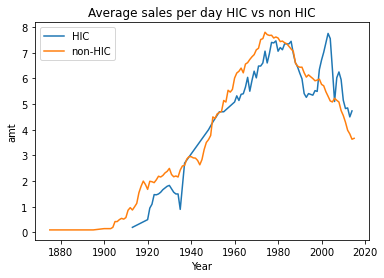

In [32]:
fig,ax = plt.subplots()
title = 'Average-sales-per-day-HIC-vs-non-HIC'
plt.title(title.replace("-"," "))
plt.ylabel("amt")
sales_by_HIC.xs(False).plot(ax=ax,label = 'HIC')
sales_by_HIC.xs(True).plot(ax=ax,label = 'non-HIC')
ax.legend(['HIC','non-HIC'])
plt.savefig(f'plots\{title}.jpg',bbox_inches ='tight')

# Tobacco production

## General

In [33]:
filename = "tobacco_production.csv"
production = pd.read_csv(filename)
production

,Country or Area,Year,Unit,Value,Value Footnotes
0,Albania,2006,Metric tons,546.600000,NaN
1,Albania,2006,Mil. USD,1.324113,NaN
2,Albania,2005,Metric tons,1878.500000,NaN
3,Albania,2005,Mil. USD,4.844285,NaN
4,Albania,2004,Metric tons,751.900000,NaN
...,...,...,...,...,...
1203,Viet Nam,2004,Metric tons,12060.000000,NaN
1204,Viet Nam,2003,Metric tons,8817.000000,NaN
1205,Viet Nam,2002,Metric tons,6623.000000,NaN
1206,Viet Nam,2001,Metric tons,1944.000000,NaN


### Clean up country names

In [34]:
production_countries = production['Country or Area'].unique()
production_countries

array(['Albania', 'Algeria', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cabo Verde', 'Cambodia', 'Canada', 'China',
       'China, Macao Special Administrative Region', 'Colombia',
       'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Ecuador', 'Egypt',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malta',
       'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
       'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Poland', 'Portugal', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia',
       'South Africa', 'Sweden', 'Switzerland', 'Syrian Arab Re

In [35]:
# countries with sales data but no production data
print([country for country in countries if country not in production_countries])

['Armenia', 'Belarus', 'Czechia', 'Czechoslovakia', 'Georgia', 'Israel', 'Moldova', 'Russia', 'Spain', 'USSR and the former Soviet Union', 'United States', 'Yugoslavia']


In [36]:
# countries with production data but no sales data
print([country for country in production_countries if country not in countries])

['Albania', 'Algeria', 'Bangladesh', 'Bosnia and Herzegovina', 'Brazil', 'Cabo Verde', 'Cambodia', 'China', 'China, Macao Special Administrative Region', 'Colombia', 'Cuba', 'Cyprus', 'Ecuador', 'Egypt', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Kenya', "Lao People's Democratic Republic", 'Lebanon', 'Luxembourg', 'Madagascar', 'Malawi', 'Malta', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Nepal', 'Nigeria', 'Republic of Moldova', 'Russian Federation', 'Serbia', 'South Africa', 'Syrian Arab Republic', 'Thailand', 'The former Yugoslav Republic of Macedonia', 'Tunisia', 'Turkey', 'Ukraine', 'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Viet Nam']


In [37]:
# some names are different but they refer to the same countries
name_map = {'United States of America': "United States",'Russian Federation':"Russia"}
my_map = {}
for country in production_countries:
    if country not in name_map:
        my_map[country]=country
    else:
        my_map[country] = name_map[country]

In [38]:
production['Country or Area'] = production['Country or Area'].map(my_map,na_action='keep')

In [39]:
production_countries = production['Country or Area'].unique()
production_countries

# countries with sales data but no production data
print([country for country in countries if country not in production_countries])

['Armenia', 'Belarus', 'Czechia', 'Czechoslovakia', 'Georgia', 'Israel', 'Moldova', 'Spain', 'USSR and the former Soviet Union', 'Yugoslavia']


### Clean up units

In [40]:
production.Unit.unique()

array(['Metric tons', 'Mil. USD'], dtype=object)

In [41]:
production_in_tons = production.loc[production.Unit=='Metric tons']
production_in_usd = production.loc[production.Unit=='Mil. USD']

## Worldwide production - trend

### Worldwide production in tons

In [42]:
df = production_in_tons[['Country or Area','Year','Value']]
df

,Country or Area,Year,Value
0,Albania,2006,546.6
2,Albania,2005,1878.5
4,Albania,2004,751.9
6,Algeria,2015,7483.0
7,Algeria,2014,7648.0
...,...,...,...
1203,Viet Nam,2004,12060.0
1204,Viet Nam,2003,8817.0
1205,Viet Nam,2002,6623.0
1206,Viet Nam,2001,1944.0


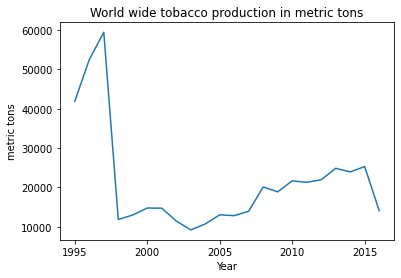

In [43]:
fig,ax = plt.subplots()
title = 'World wide tobacco production in metric tons'
plt.title(title)
plt.ylabel("metric tons")
df.groupby('Year').mean().plot(ax=ax,legend=False)
title = title.replace(" ","-")
plt.savefig(f'plots\{title}.jpg',bbox_inches ='tight')


### Worldwide production in USD

In [44]:
df = production_in_usd[['Country or Area','Year','Value']]

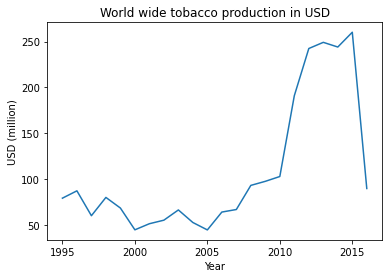

In [45]:
fig,ax = plt.subplots()
title = 'World wide tobacco production in USD'
plt.title(title)
plt.ylabel("USD (million)")
df.groupby('Year').mean().plot(ax=ax,legend=False)
title = title.replace(" ","-")
plt.savefig(f'plots\{title}.jpg',bbox_inches ='tight')

### Compare tons vs usd

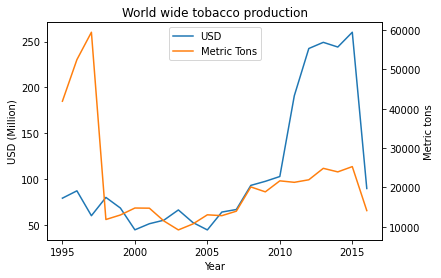

In [46]:
fig,ax = plt.subplots()

title = 'World wide tobacco production'
plt.title(title)

df = production_in_usd[['Country or Area','Year','Value']]
df.groupby('Year').mean().plot(ax=ax,label="Metric tons")
ax.set_ylabel("USD (Million)")
df = production_in_tons[['Country or Area','Year','Value']]
df.groupby('Year').mean().plot(ax=ax,secondary_y=True,label="USD")
plt.ylabel("Metric tons")
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, ["USD","Metric Tons"],loc='upper center')

title = title.replace(" ","-")
plt.savefig(f'plots\{title}.jpg',bbox_inches ='tight')

# tobacco use worldwide by individual location

In [47]:
filename = "tobacco_use_ww.csv"
use = pd.read_csv(filename)

## Combine use & production

### AvgProdInTons

In [76]:
production_in_tons_avg = production_in_tons.groupby('Country or Area').mean().Value

In [77]:
production_in_tons_dict = production_in_tons_avg.to_dict()

In [126]:
use['AvgProdInTons'] = use['Location'].map(production_in_tons_dict)

### AvgProdInUSD

In [127]:
production_in_usd_avg = production_in_usd.groupby('Country or Area').mean().Value
production_in_usd_dict = production_in_usd_avg.to_dict()
use['AvgProdInUSD'] = use['Location'].map(production_in_usd_dict)

## Combine use & death rates 

In [95]:
filename = "death_rates_smoking_age.csv"
death = pd.read_csv(filename)
death

,Entity,Code,Year,All_ages,Under_5,5_14,50_69,15_49,70_plus
0,Afghanistan,AFG,1990,63.895905,NaN,NaN,267.230009,16.589519,679.006755
1,Afghanistan,AFG,1991,61.846347,NaN,NaN,266.975516,15.456913,677.617648
2,Afghanistan,AFG,1992,53.436511,NaN,NaN,266.430053,12.767999,679.505810
3,Afghanistan,AFG,1993,47.044347,NaN,NaN,267.969428,11.000425,683.973588
4,Afghanistan,AFG,1994,45.799808,NaN,NaN,272.403687,10.738020,691.007773
...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,66.609741,NaN,NaN,430.024361,24.046022,1275.647333
6464,Zimbabwe,ZWE,2014,63.983527,NaN,NaN,408.855801,22.964390,1220.939407
6465,Zimbabwe,ZWE,2015,62.211166,NaN,NaN,392.380248,22.393477,1174.938436
6466,Zimbabwe,ZWE,2016,60.644339,NaN,NaN,378.003366,21.768089,1124.960820


In [97]:
avg_death = death.groupby('Code').mean()
avg_death.drop('Year',axis=1,inplace=True)
death_dict = avg_death.to_dict()

In [115]:
for age_group in death_dict:
    d = death_dict[age_group]
    use[f'DR_{age_group}'] = use.SpatialDimValueCode.map(d)

## Combine use & sales

In [120]:
sales

,Entity,Code,Year,amt,HIC
0,Armenia,ARM,1988,12.0,False
1,Armenia,ARM,1989,11.6,False
2,Armenia,ARM,1990,11.9,False
3,Armenia,ARM,1991,9.3,False
4,Armenia,ARM,1992,4.9,False
...,...,...,...,...,...
2762,Yugoslavia,OWID_YGS,1988,8.9,False
2763,Yugoslavia,OWID_YGS,1989,8.5,False
2764,Yugoslavia,OWID_YGS,1990,8.5,False
2765,Yugoslavia,OWID_YGS,1991,7.8,False


In [123]:
avg_sales = sales.groupby('Code').mean().amt
sales_dict = avg_sales.to_dict()

In [124]:
use['AvgSales'] = use.SpatialDimValueCode.map(sales_dict)

In [130]:
use

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value,DR_All_ages,DR_Under_5,DR_5_14,DR_50_69,DR_15_49,DR_70_plus,AvgSales,AvgProdInTons,AvgProdInUSD
0,SEAR,South-East Asia,PRK,Democratic People's Republic of Korea,2018,Female,0.0,112.853149,NaN,NaN,347.771223,19.388240,891.474930,NaN,NaN,NaN
1,EUR,Europe,AZE,Azerbaijan,2018,Female,0.2,105.697292,NaN,NaN,431.861953,25.134131,1062.828277,3.727273,4199.268182,4.609049
2,AFR,Africa,ERI,Eritrea,2018,Female,0.3,32.481287,NaN,NaN,243.979237,30.072392,297.334031,NaN,NaN,NaN
3,EMR,Eastern Mediterranean,EGY,Egypt,2018,Female,0.4,68.553491,NaN,NaN,359.320920,19.689972,1056.396665,NaN,47947.882353,144.695421
4,AFR,Africa,GHA,Ghana,2018,Female,0.4,22.332730,NaN,NaN,145.609015,6.861757,354.035665,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,WPR,Western Pacific,TUV,Tuvalu,2000,Male,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4019,AMR,Americas,JAM,Jamaica,2000,Female,9.1,62.438214,NaN,NaN,197.443209,7.464586,633.594501,NaN,NaN,NaN
4020,AFR,Africa,STP,Sao Tome and Principe,2000,Male,9.2,20.333939,NaN,NaN,118.578796,3.718445,359.794459,NaN,NaN,NaN
4021,EMR,Eastern Mediterranean,OMN,Oman,2000,Both sexes,9.5,26.259156,NaN,NaN,190.700174,8.118750,568.169427,NaN,NaN,NaN


# tobacco use worldwide by parent location

In [131]:
parent = use.ParentLocationCode.copy()

## Combine use & production

### AvgProdInTons

In [132]:
parent['AvgProdInTons'] = parent['Location'].map(production_in_tons_dict)

### AvgProdInUSD

In [ ]:
production_in_usd_avg = production_in_usd.groupby('Country or Area').mean().Value
production_in_usd_dict = production_in_usd_avg.to_dict()
parent['AvgProdInUSD'] = parent['Location'].map(production_in_usd_dict)

## Combine use & death rates 

In [ ]:
filename = "death_rates_smoking_age.csv"
death = pd.read_csv(filename)
death

,Entity,Code,Year,All_ages,Under_5,5_14,50_69,15_49,70_plus
0,Afghanistan,AFG,1990,63.895905,NaN,NaN,267.230009,16.589519,679.006755
1,Afghanistan,AFG,1991,61.846347,NaN,NaN,266.975516,15.456913,677.617648
2,Afghanistan,AFG,1992,53.436511,NaN,NaN,266.430053,12.767999,679.505810
3,Afghanistan,AFG,1993,47.044347,NaN,NaN,267.969428,11.000425,683.973588
4,Afghanistan,AFG,1994,45.799808,NaN,NaN,272.403687,10.738020,691.007773
...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,66.609741,NaN,NaN,430.024361,24.046022,1275.647333
6464,Zimbabwe,ZWE,2014,63.983527,NaN,NaN,408.855801,22.964390,1220.939407
6465,Zimbabwe,ZWE,2015,62.211166,NaN,NaN,392.380248,22.393477,1174.938436
6466,Zimbabwe,ZWE,2016,60.644339,NaN,NaN,378.003366,21.768089,1124.960820


In [ ]:
avg_death = death.groupby('Code').mean()
avg_death.drop('Year',axis=1,inplace=True)
death_dict = avg_death.to_dict()

In [ ]:
for age_group in death_dict:
    d = death_dict[age_group]
    use[f'DR_{age_group}'] = use.SpatialDimValueCode.map(d)

## Combine use & sales

In [ ]:
sales

,Entity,Code,Year,amt,HIC
0,Armenia,ARM,1988,12.0,False
1,Armenia,ARM,1989,11.6,False
2,Armenia,ARM,1990,11.9,False
3,Armenia,ARM,1991,9.3,False
4,Armenia,ARM,1992,4.9,False
...,...,...,...,...,...
2762,Yugoslavia,OWID_YGS,1988,8.9,False
2763,Yugoslavia,OWID_YGS,1989,8.5,False
2764,Yugoslavia,OWID_YGS,1990,8.5,False
2765,Yugoslavia,OWID_YGS,1991,7.8,False


In [ ]:
avg_sales = sales.groupby('Code').mean().amt
sales_dict = avg_sales.to_dict()

In [ ]:
use['AvgSales'] = use.SpatialDimValueCode.map(sales_dict)

In [ ]:
use

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value,DR_All_ages,DR_Under_5,DR_5_14,DR_50_69,DR_15_49,DR_70_plus,AvgSales,AvgProdInTons,AvgProdInUSD
0,SEAR,South-East Asia,PRK,Democratic People's Republic of Korea,2018,Female,0.0,112.853149,NaN,NaN,347.771223,19.388240,891.474930,NaN,NaN,NaN
1,EUR,Europe,AZE,Azerbaijan,2018,Female,0.2,105.697292,NaN,NaN,431.861953,25.134131,1062.828277,3.727273,4199.268182,4.609049
2,AFR,Africa,ERI,Eritrea,2018,Female,0.3,32.481287,NaN,NaN,243.979237,30.072392,297.334031,NaN,NaN,NaN
3,EMR,Eastern Mediterranean,EGY,Egypt,2018,Female,0.4,68.553491,NaN,NaN,359.320920,19.689972,1056.396665,NaN,47947.882353,144.695421
4,AFR,Africa,GHA,Ghana,2018,Female,0.4,22.332730,NaN,NaN,145.609015,6.861757,354.035665,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,WPR,Western Pacific,TUV,Tuvalu,2000,Male,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4019,AMR,Americas,JAM,Jamaica,2000,Female,9.1,62.438214,NaN,NaN,197.443209,7.464586,633.594501,NaN,NaN,NaN
4020,AFR,Africa,STP,Sao Tome and Principe,2000,Male,9.2,20.333939,NaN,NaN,118.578796,3.718445,359.794459,NaN,NaN,NaN
4021,EMR,Eastern Mediterranean,OMN,Oman,2000,Both sexes,9.5,26.259156,NaN,NaN,190.700174,8.118750,568.169427,NaN,NaN,NaN
